<a href="https://colab.research.google.com/github/yanter5/lab-2-phase-2-yanter5/blob/main/Copy_of_DATA_301_Lab_2B_Evidence_of_Discrimination%3F_Cole_Yant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `https://dlsun.github.io/pods/data/ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

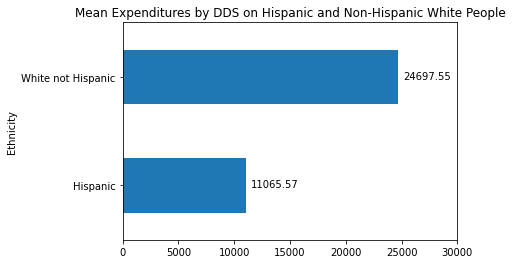

In [ ]:
import pandas as pd

dds = pd.read_csv('https://dlsun.github.io/pods/data/ca_dds_expenditures.csv')
dds = dds.set_index('Id')
dds_white = dds.loc[(dds['Ethnicity'] == 'White not Hispanic')|(dds['Ethnicity'] =='Hispanic')]
exp_plot = dds_white.groupby('Ethnicity')['Expenditures'].mean().plot.barh(title = 'Mean Expenditures by DDS on Hispanic and Non-Hispanic White People', xlim=(0, 30000))
for p in exp_plot.patches:
  exp_plot.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 25), textcoords='offset points')

Non-hispanic white people seem to get much higher funding on average than their hispanic counterparts. Whites get \$24607.55 on average, while Hispanics only get $11065.57 on average.

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


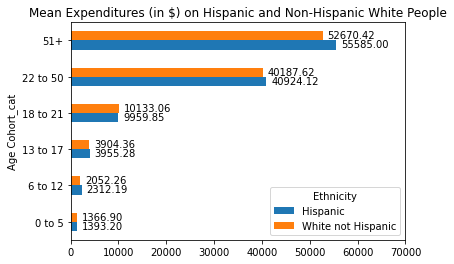

In [ ]:
from pandas.api.types import CategoricalDtype

cat_age_order = CategoricalDtype(
    ['0 to 5', '6 to 12', '13 to 17', '18 to 21', '22 to 50', '51+'], 
    ordered=True
)

dds_white['Age Cohort_cat'] = dds_white['Age Cohort'].astype(cat_age_order)

dds_exp_unstack = dds_white.groupby(['Age Cohort_cat', 'Ethnicity'])['Expenditures'].mean().unstack('Ethnicity').plot.barh(xlim = (0, 70000),title = 'Mean Expenditures (in $) on Hispanic and Non-Hispanic White People')
for p in dds_exp_unstack.patches:
  dds_exp_unstack.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 2), textcoords='offset points')

These results seem to indicate that Hispanics receive about the same, if not more, funds than Whites. This contradict the findings in the last question because white people seemed to receive aid at such a higher number than hispanic people.

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

In [ ]:
joint_agec_eth = pd.crosstab(dds_white['Age Cohort_cat'], dds_white['Ethnicity'])
cond_agec_eth = joint_agec_eth.sum(axis = 0)
joint_agec_eth.divide(cond_agec_eth, axis = 1) 

Ethnicity,Hispanic,White not Hispanic
Age Cohort_cat,,
0 to 5,0.117021,0.049875
6 to 12,0.242021,0.114713
13 to 17,0.273936,0.167082
18 to 21,0.207447,0.172070
22 to 50,0.114362,0.331671
51+,0.045213,0.164589


Looking at the marginal probabilities of Age Cohort based on ethnicity, it looks like there are some major differences in age distribution between the two populations of ethnicity here. Let's visualize this relationship.

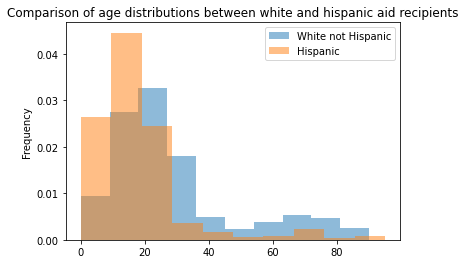

In [ ]:
for eth in dds_white['Ethnicity'].unique():
      dds_white[dds_white["Ethnicity"] == eth]["Age"].plot.hist(
        label=eth,
        density=True,
        alpha=0.5,
        legend=True,
        title= 'Comparison of age distributions between white and hispanic aid recipients'
    )

It appears that hispanic aid recipients tend to be much younger than white aid recipients. This may be a contributing factor to the observed discrepancy if age is related to funding received. 

Text(0.5, 0, 'Mean Expenditure ($)')

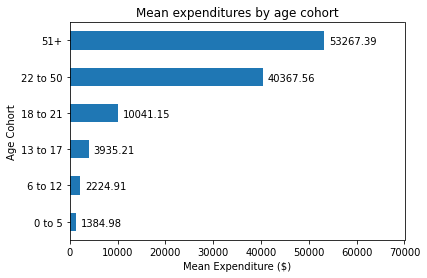

In [ ]:
dds_age_exp = dds_white.groupby('Age Cohort_cat')['Expenditures'].mean().plot.barh(xlim = (0, 70000), title = 'Mean expenditures by age cohort', xlabel='Age Cohort')
for p in dds_age_exp.patches:
  dds_age_exp.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 5), textcoords='offset points')
dds_age_exp.set_xlabel('Mean Expenditure ($)')

The aid given does get larger, on average, as age increases. Putting this all together, the discrepancy in spending on hispanic and non-hispanic white people is likely due to differences in ages in the population. Since the average ages of white people tend to be larger on average, the average expenditures on white people would also be expected to be larger.

With all this being said, we cannot fully rule out the possibility that the DDS intentionally gives out more money to white people than hispanic people. It is possible that the institution knows that there are more old people amongst the white population, and they decide to award old people with more money because they are white. This is unlikely, however, and not something we can detect with data.

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 2B - YOUR NAME HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.